# Vivendo Food Claims Data Exploration
## by Abdulmaleek Oladipo

## Introduction
This dataset includes information about claims made by customers of this fast food establishments against the company (Vivendo).


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
food_claims = pd.read_csv('claims.csv')

In [3]:
food_claims.head(5)

,Claim ID,Time to Close,Claim Amount,Amount Paid,Location,Individuals on Claim,Linked Cases,Cause
0,0000000-00.2010.0.00.0094,2082,"R$50,000.00",34297.47,RECIFE,2,False,NaN
1,0000000-00.2011.0.00.0086,3591,"R$180,000.00",56383.54,SAO LUIS,7,False,NaN
2,0000000-00.2012.0.00.0092,2997,"R$70,000.00",12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,"R$95,104.00",29217.16,FORTALEZA,4,False,NaN
4,0000000-00.2014.0.00.0097,117,"R$29,000.00",12610.50,FORTALEZA,1,False,meat


In [4]:
# high-level overview of data shape and composition
print(food_claims.shape)
print(food_claims.info())

(98, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Claim ID              98 non-null     object 
 1   Time to Close         98 non-null     int64  
 2   Claim Amount          98 non-null     object 
 3   Amount Paid           98 non-null     float64
 4   Location              98 non-null     object 
 5   Individuals on Claim  98 non-null     int64  
 6   Linked Cases          98 non-null     bool   
 7   Cause                 20 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 5.6+ KB
None


In [5]:
# renaming all column labels to replace spaces with underscores
# and convert everything to lowerccase
food_claims.rename(columns=lambda x:x.strip().lower().replace(" ","_"),inplace=True)

In [6]:
#check effect of changes made
list(food_claims)

['claim_id',
 'time_to_close',
 'claim_amount',
 'amount_paid',
 'location',
 'individuals_on_claim',
 'linked_cases',
 'cause']

In [7]:
food_claims.claim_id.nunique()

98

In [8]:
food_claims.location.unique()

array(['RECIFE', 'SAO LUIS', 'FORTALEZA', 'NATAL'], dtype=object)

In [9]:
food_claims.sample(5)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
95,0000000-00.2020.0.00.0010,201,"R$60,000.00",42318.80,NATAL,2,False,NaN
47,0000000-00.2018.0.00.0005,769,"R$40,000.00",6559.11,RECIFE,1,False,NaN
44,0000000-00.2018.0.00.0013,823,"R$82,327.00",64982.76,NATAL,3,False,NaN
54,0000000-00.2019.0.00.0060,642,"R$363,746.00",177379.01,NATAL,15,True,NaN
38,0000000-00.2018.0.00.0003,925,"R$3,841.00",1324.24,RECIFE,0,False,NaN


In [10]:
# fill null values in the cause column with 'unknown'
food_claims.cause.fillna('unknown', inplace=True)

In [11]:
# confirming the change made
food_claims.cause.unique()

array(['unknown', 'vegetables', 'meat'], dtype=object)

In [12]:
food_claims.linked_cases.value_counts()

False    89
True      9
Name: linked_cases, dtype: int64

In [13]:
food_claims[food_claims['linked_cases']== True]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
28,0000000-00.2017.0.00.0031,1169,"R$400,000.00",119084.55,SAO LUIS,17,True,vegetables
29,0000000-00.2017.0.00.0011,1164,"R$704,839.00",164058.23,RECIFE,30,True,meat
33,0000000-00.2018.0.00.0089,1051,"R$410,000.00",294547.51,SAO LUIS,18,True,unknown
40,0000000-00.2018.0.00.0098,153,"R$936,540.00",433320.46,NATAL,41,True,unknown
54,0000000-00.2019.0.00.0060,642,"R$363,746.00",177379.01,NATAL,15,True,unknown
59,0000000-00.2019.0.00.0009,634,"R$754,317.00",145843.76,NATAL,33,True,meat
78,0000000-00.2020.0.00.0035,60,"R$736,422.00",558725.77,SAO LUIS,32,True,vegetables
88,0000000-00.2020.0.00.0014,149,"R$409,816.00",279638.60,NATAL,17,True,unknown
96,0000000-00.2020.0.00.0059,200,"R$474,542.00",329473.49,NATAL,20,True,unknown


In [14]:
# changing the claim amount column from str to int datatype
food_claims['claim_amount']= food_claims.claim_amount.str.replace(",","")  #removing comma
food_claims['claim_amount']= food_claims.claim_amount.str[2:]  #removing 'R$'
food_claims['claim_amount']= food_claims.claim_amount.str[:-3]  #removing the decimal part and the decimal point
food_claims['claim_amount']= food_claims.claim_amount.astype(int) #finally converting to integer

In [15]:
# to confirm the changes made
print(food_claims.dtypes)
food_claims.head(5)

claim_id                 object
time_to_close             int64
claim_amount              int32
amount_paid             float64
location                 object
individuals_on_claim      int64
linked_cases               bool
cause                    object
dtype: object


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,0000000-00.2010.0.00.0094,2082,50000,34297.47,RECIFE,2,False,unknown
1,0000000-00.2011.0.00.0086,3591,180000,56383.54,SAO LUIS,7,False,unknown
2,0000000-00.2012.0.00.0092,2997,70000,12366.76,SAO LUIS,3,False,vegetables
3,0000000-00.2013.0.00.0096,1143,95104,29217.16,FORTALEZA,4,False,unknown
4,0000000-00.2014.0.00.0097,117,29000,12610.50,FORTALEZA,1,False,meat


In [16]:
food_claims.describe()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,98.000000,98.000000,98.000000,98.000000
mean,832.346939,122952.030612,58448.238571,4.908163
std,686.851131,166433.389040,87525.873849,7.292259
min,-57.000000,3555.000000,999.680000,0.000000
25%,340.750000,40000.000000,15965.642500,1.000000
50%,638.500000,58454.500000,29451.040000,2.000000
75%,1138.750000,136573.250000,52114.760000,5.750000
max,3591.000000,936540.000000,558725.770000,41.000000


In [17]:
food_claims[food_claims['time_to_close'] == food_claims.time_to_close.min()]

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
58,0000000-00.2019.0.00.0079,-57,3672,999.68,SAO LUIS,0,False,unknown


In [18]:
# dropping the row with "-57" in the time_to_close column, since day cannot be negative
food_claims.drop(food_claims[food_claims['time_to_close'] == food_claims.time_to_close.min()].index,inplace=True)

In [19]:
#checking the effect of the change made
food_claims.describe()

,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,97.000000,97.000000,97.000000,97.000000
mean,841.515464,124181.721649,59040.491753,4.958763
std,684.364534,166849.878773,87782.945060,7.312828
min,29.000000,3555.000000,1013.360000,0.000000
25%,349.000000,40000.000000,16280.920000,1.000000
50%,639.000000,60000.000000,29684.920000,2.000000
75%,1143.000000,136642.000000,52374.980000,6.000000
max,3591.000000,936540.000000,558725.770000,41.000000


In [30]:
food_claims.nunique()

claim_id                97
time_to_close           95
claim_amount            73
amount_paid             97
location                 4
individuals_on_claim    19
linked_cases             2
cause                    3
dtype: int64

### What is the structure of your dataset?

There are 97 claims in the wrangled version of the dataset with 8 features (claim_id, time_to_close, claim_amount, amount_paid, location, individuals_on_claims, linked_cases, cause). Most variables are numeric or text in nature, but the variable linked_cases is a boolean variables.

### What is/are the main feature(s) of interest in your dataset?

- I'm interested in figuring out how the number of claims differ across locations

- What is the distribution of time to close claims?

- How does the average time to close claims differ by location?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that a modification of claim_id and individuals_on_claim are the features to determine which location has the most claims. I also think that time_to_close is the feature to get how long it takes to close a claim in a location on average.

## Univariate Exploration



#### Variable 1
Looking at the distribution of "time_to_close" variable first.

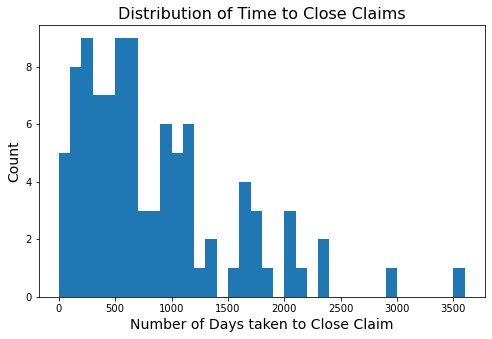

In [48]:
# start with a standard-scaled plot
binsize = 100

bins = np.arange(0, food_claims['time_to_close'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = food_claims, x = 'time_to_close', bins=bins)
plt.title('Distribution of Time to Close Claims', fontsize=16)
plt.xlabel('Number of Days taken to Close Claim', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

The distribution is skewed to the right and ended up with an unevenly balanced plot with a lot of gaps in order to capture the highest values points. <br>
Putting it on a log scale instead

In [21]:
food_claims['time_to_close'].describe()

count      97.000000
mean      841.515464
std       684.364534
min        29.000000
25%       349.000000
50%       639.000000
75%      1143.000000
max      3591.000000
Name: time_to_close, dtype: float64

In [22]:
np.log10(food_claims['time_to_close'].describe())

count    1.986772
mean     2.925062
std      2.835287
min      1.462398
25%      2.542825
50%      2.805501
75%      3.058046
max      3.555215
Name: time_to_close, dtype: float64

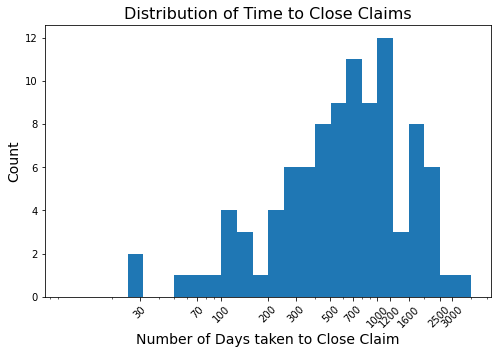

In [49]:
# log scale plot of number of days taken to close claim
log_binsize = 0.1
bins = 10 ** np.arange(1, np.log10(food_claims['time_to_close'].max())+log_binsize, log_binsize)
ticks = [30, 70, 100,200, 300,500, 700, 1000, 1200, 1600, 2500, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = food_claims, x = 'time_to_close', bins = bins)
plt.xscale('log')
plt.title('Distribution of Time to Close Claims', fontsize=16)
plt.xlabel('Number of Days taken to Close Claim', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks, labels, rotation=45)
plt.show()

This implies that the data is approximately unimodal with a peak around 1000-1200 using these tick labels. <br>
Most common number of days taken to close claims are between 200 and 2500, with a bit of a dip in 1200-1600 range.

#### Variable 2
Next, I'll look at the distribution of claim amount

There's a very long tail of Initial Claim Value. Here, I've focused on Claim Amount of value R$250,000 or less, so that I can use a smaller bin size to get a more detailed look at the main data distribution.

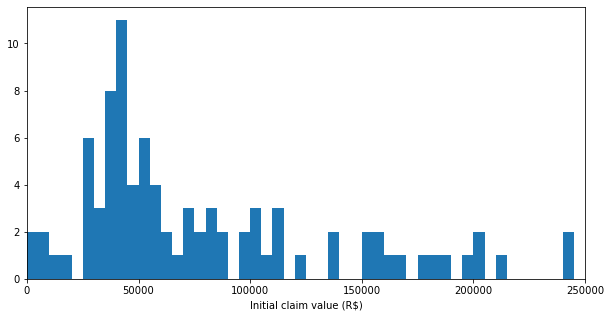

In [24]:
bins = np.arange(0, food_claims['claim_amount'].max()+5000, 5000)

plt.figure(figsize=[10,5])
plt.hist(data=food_claims, x='claim_amount', bins=bins);
plt.xlabel('Initial claim value (R$)')
plt.xlim((0,250000))
plt.show()

This distribution ended up with an unevenly balanced plot with a few gaps in order to capture the highest values points.<br>
A logarithmic transformation is then applied on the x-axis

In [25]:
food_claims['claim_amount'].describe()

count        97.000000
mean     124181.721649
std      166849.878773
min        3555.000000
25%       40000.000000
50%       60000.000000
75%      136642.000000
max      936540.000000
Name: claim_amount, dtype: float64

In [26]:
np.log10(food_claims['claim_amount'].describe())

count    1.986772
mean     5.094058
std      5.222326
min      3.550840
25%      4.602060
50%      4.778151
75%      5.135584
max      5.971526
Name: claim_amount, dtype: float64

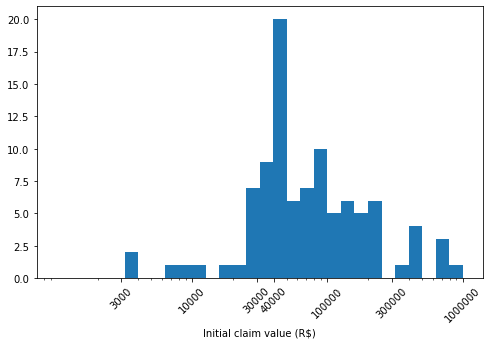

In [27]:
# log scale plot of initial claim value
log_binsize = 0.1
bins = 10 ** np.arange(3, np.log10(food_claims['claim_amount'].max())+log_binsize, log_binsize)
ticks = [3000, 10000, 30000, 40000, 100000, 300000, 1000000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = food_claims, x = 'claim_amount', bins = bins)
plt.xscale('log')
plt.xlabel('Initial claim value (R$)')
plt.xticks(ticks, labels, rotation=45)
plt.show()

When plotted on a log-scale, the claim amount distribution looks unimodal, with the peak around R$40000

#### Variable 3
Next up, the variable of interest is location

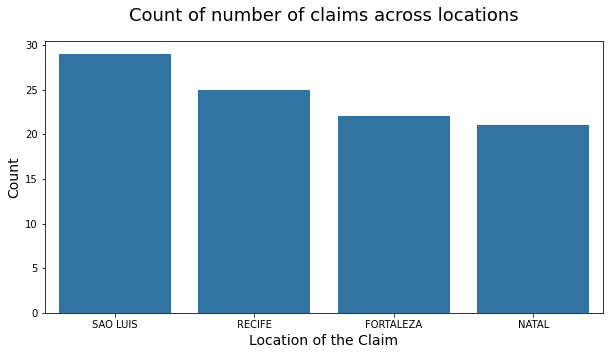

In [46]:
#a column chart of count of claims across different locations

plt.figure(figsize = [10,5])

base_color = sb.color_palette()[0]
order = food_claims.location.value_counts().index
ax= sb.countplot(data=food_claims, x='location', color=base_color, order=order)
ax.set_title('Count of number of claims across locations', fontsize=18, pad=20)
ax.set_xlabel('Location of the Claim', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

plt.show()

Sao Luis is the location with most claims, followed by Recife and then Fortaleza in third, with Natal being the location with the least claims. There is no much difference on the number of claims made across the different locations

## Bivariate Exploration

In this section,  investigated relationships between pairs of variables in my
data. The variables covered here have been introduced in some
fashion in the previous section (univariate exploration).

#### Bivariate 1
To start off with, I want to look at the correlations present between time_to_close and location.

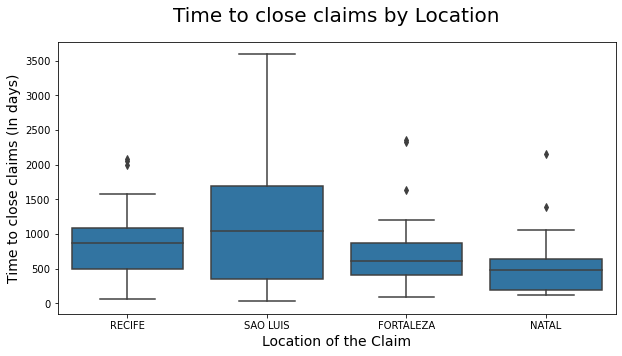

In [52]:
plt.figure(figsize = [10,5])
ax=sb.boxplot(data=food_claims, x='location', y='time_to_close', color=base_color)
ax.set_title('Time to close claims by Location', fontsize=20, pad=20)
ax.set_xlabel('Location of the Claim', fontsize=14)
ax.set_ylabel('Time to close claims (In days)', fontsize=14)
plt.show()

It could be seen from the plot above that Sao Luis is the location that took most time(days) to close claims on the average, followed by Recife and then Fortaleza. While Natal is the location that took the least time(days) to close on the average.

### Some of the relationships I observed in this part of the investigation. How the feature(s) of interest vary with other features in the dataset?

Sao Luis is the location that took the most average number of days to close. It is also the only location that has its top whisker a bit longer and different from the others, which implies that it has claims that took extremely long time to close.

## Conclusions

Before exploring, I carried out preliminary wrangling to fill null values in the cause column with 'unknown' and to also drop the row with negative value in the time to close column, since day cannot be negative.

During the exploration, I discovered that Sao Luis is the location with most claims and there is no much difference on the number of claims made across the different locations.

I also found out that time_to_close has an approximately unimodal distribution with a peak around 1000-1200 days. Most common number of days taken to close claims are between 200 and 2500, with a bit of a dip in 1200-1600 range.

Sao Luis is the location that took most time(days) to close claims on the average, followed by Recife and then Fortaleza. While Natal is the location that took the least time(days) to close on the average.
Sao Luis is also the only location that has its top whisker a bit longer and different from the others, which implies that it has claims that took extremely long time to close.

### Limitations

There is no data on the number of vivendo outlets around legal team locations.

### Suggestions

Based on all of the above, I would recommend more personnel are added to the legal team in Sao Luis, as it is the location with most claims and also the location that took most time to close claims of customer on average. Further analysis should be done to understand if the number of vivendo outlets around legal team locations impact the number of claims.